<a href="https://colab.research.google.com/github/icardemil64/IA_CONTROL_DL/blob/main/IMDB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías

In [2]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
print("Tensorflow: " + tf.__version__)

Tensorflow: 2.5.0


#Importar datos

In [3]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [4]:
word_index = imdb.get_word_index()

In [5]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [6]:
decode_review = ' '.join(
    [reverse_word_index.get(i - 3,'?') for i in train_data[0]]
)
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preprocesado de datos

In [7]:
def vectorize(seq, dim = 10000):
  results = np.zeros((len(seq), dim))
  for i, seq in enumerate(seq):
    results[i,seq] = 1
  return results

In [8]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Crear modelos

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [11]:
x_val = x_train[:10000]
x_trn = x_train[10000:]
y_val = y_train[:10000]
y_trn = y_train[10000:]

##Modelo original

In [12]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history_orig = model.fit(x_trn,y_trn,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 17s 58ms/step - loss: 0.6427 - accuracy: 0.6861 - val_loss: 0.4378 - val_accuracy: 0.8554
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3662 - accuracy: 0.8870 - val_loss: 0.3102 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2334 - accuracy: 0.9210 - val_loss: 0.2782 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1652 - accuracy: 0.9503 - val_loss: 0.2776 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1235 - accuracy: 0.9664 - val_loss: 0.2906 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0959 - accuracy: 0.9752 - val_loss: 0.3090 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0744 - accuracy: 0.9826 - val_loss: 0.3329 - val_accuracy: 0.8812
Epoch 8/20
3

In [15]:
result = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7119 - accuracy: 0.8563


#Modelo con regularizador

In [16]:
model_reg = Sequential()
model_reg.add(Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(10000,)))
model_reg.add(Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_reg.add(Dense(1, activation='sigmoid'))

In [17]:
model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history_reg = model_reg.fit(x_trn,y_trn, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.9785 - accuracy: 0.6446 - val_loss: 0.6783 - val_accuracy: 0.8444
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6327 - accuracy: 0.8746 - val_loss: 0.5802 - val_accuracy: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5413 - accuracy: 0.8949 - val_loss: 0.5374 - val_accuracy: 0.8689
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4935 - accuracy: 0.8994 - val_loss: 0.5076 - val_accuracy: 0.8763
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4611 - accuracy: 0.9074 - val_loss: 0.4899 - val_accuracy: 0.8782
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4402 - accuracy: 0.9115 - val_loss: 0.4743 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4162 - accuracy: 0.9166 - val_loss: 0.4604 - val_accuracy: 0.8802
Epoch 8/20
30

In [19]:
result_reg = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7119 - accuracy: 0.8563


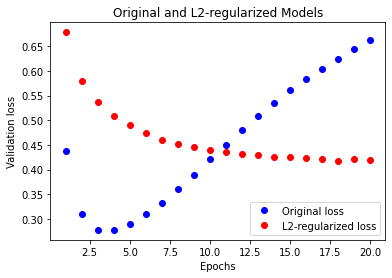

In [20]:
import matplotlib.pyplot as plt

plt.clf()
#history_orig = history_orig.history
#history_reg = history_reg.history
origi_val_loss_values = history_orig.history['val_loss']
regul_val_loss_values = history_reg.history['val_loss']
epochs = range(1, (len(history_orig.history['loss']) + 1))
plt.plot(epochs, origi_val_loss_values, 'bo', label='Original loss')
plt.plot(epochs, regul_val_loss_values, 'ro' , label='L2-regularized loss')
plt.title('Original and L2-regularized Models')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

#No funciona 😔